In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns

from sklearn.metrics import accuracy_score, log_loss
import xgboost as xgb
from sklearn.model_selection import GroupKFold

plt.style.use("fivethirtyeight")
mypal = plt.rcParams["axes.prop_cycle"].by_key()["color"]  # Grab the color pal

In [2]:
tourney_seeds = pd.read_csv('/work/2024_tourney_seeds.csv')
cities = pd.read_csv('/work/Cities.csv')
con = pd.read_csv('/work/Conferences.csv')
wt = pd.read_csv('/work/WTeams.csv')
wtsp = pd.read_csv('/work/WTeamSpellings.csv', encoding='latin-1')  # Replace with appropriate encoding if known
mtsrs = pd.read_csv('/work/MNCAATourneySeedRoundSlots.csv')
mt = pd.read_csv('/work/MTeams.csv')
mts = pd.read_csv('/work/MTeamSpellings.csv', encoding='latin-1')

In [3]:
tourney_seeds

,Tournament,Seed,TeamID
0,M,W01,1163
1,M,W02,1235
2,M,W03,1228
3,M,W04,1120
4,M,W05,1361
...,...,...,...
123,W,Z12,3162
124,W,Z13,3267
125,W,Z14,3238
126,W,Z15,3263


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tournament  128 non-null    object
 1   Seed        128 non-null    object
 2   TeamID      128 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


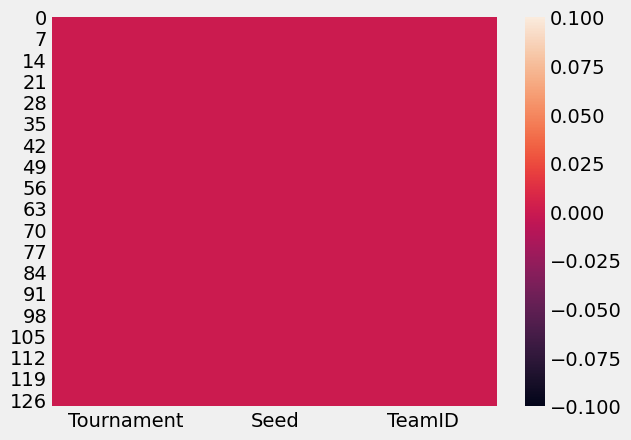

,TeamID
count,128.000000
mean,2282.570312
std,1016.136296
min,1103.000000
25%,1269.000000
50%,2283.500000
75%,3277.500000
max,3465.000000


In [4]:
tourney_seeds.head()
tourney_seeds.info()
import seaborn as sns
sns.heatmap(tourney_seeds.isnull())
plt.show()
tourney_seeds.dtypes
tourney_seeds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CityID  484 non-null    int64 
 1   City    484 non-null    object
 2   State   484 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.5+ KB


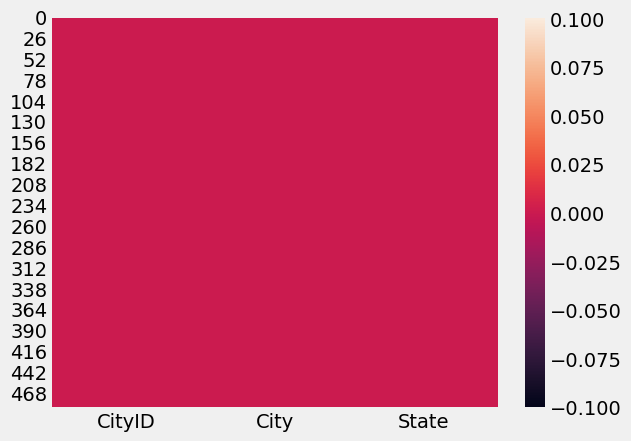

,CityID
count,484.000000
mean,4247.285124
std,146.417867
min,4001.000000
25%,4121.750000
50%,4242.500000
75%,4364.250000
max,4506.000000


In [5]:
cities.head()
cities.info()
import seaborn as sns
sns.heatmap(cities.isnull())
plt.show()
cities.dtypes
cities.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ConfAbbrev   51 non-null     object
 1   Description  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


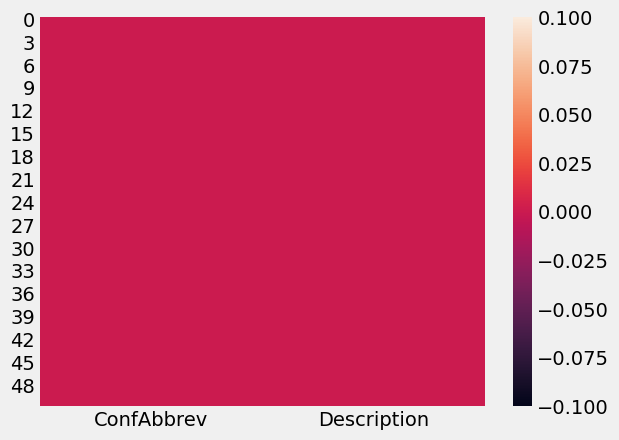

,ConfAbbrev,Description
count,51,51
unique,51,51
top,a_sun,Atlantic Sun Conference
freq,1,1


In [6]:
con.head()
con.info()
import seaborn as sns
sns.heatmap(con.isnull())
plt.show()
con.dtypes
con.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TeamID    376 non-null    int64 
 1   TeamName  376 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


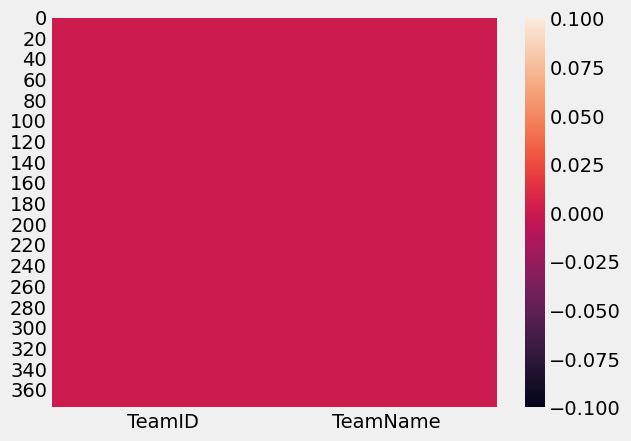

,TeamID
count,376.000000
mean,3289.460106
std,109.054157
min,3101.000000
25%,3195.750000
50%,3289.500000
75%,3383.250000
max,3478.000000


In [7]:
wt.head()
wt.info()
import seaborn as sns
sns.heatmap(wt.isnull())
plt.show()
wt.dtypes
wt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TeamNameSpelling  1158 non-null   object
 1   TeamID            1158 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.2+ KB


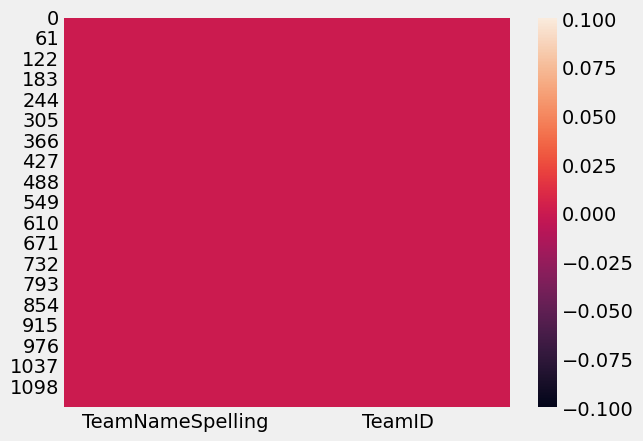

,TeamID
count,1158.000000
mean,3292.224525
std,105.825861
min,3101.000000
25%,3199.000000
50%,3294.000000
75%,3384.000000
max,3478.000000


In [8]:
wtsp.head()
wtsp.info()
import seaborn as sns
sns.heatmap(wtsp.isnull())
plt.show()
wtsp.dtypes
wtsp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Seed         776 non-null    object
 1   GameRound    776 non-null    int64 
 2   GameSlot     776 non-null    object
 3   EarlyDayNum  776 non-null    int64 
 4   LateDayNum   776 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 30.4+ KB


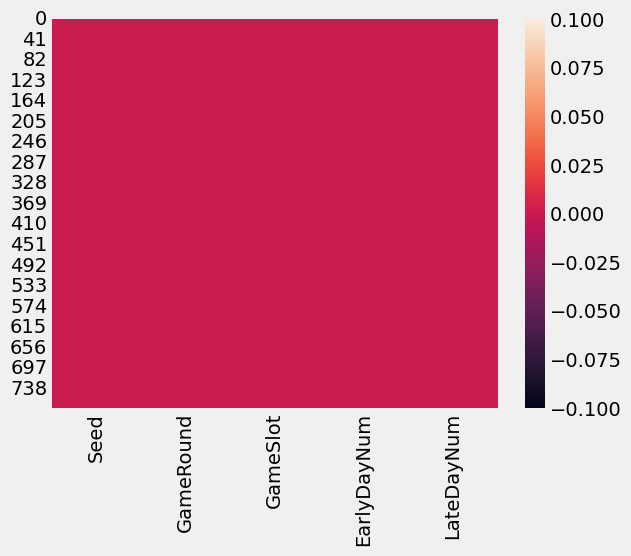

,GameRound,EarlyDayNum,LateDayNum
count,776.000000,776.000000,776.000000
mean,3.247423,143.896907,144.587629
std,1.879085,6.957173,6.555770
min,0.000000,134.000000,135.000000
25%,2.000000,138.000000,139.000000
50%,3.000000,143.000000,144.000000
75%,5.000000,152.000000,152.000000
max,6.000000,154.000000,154.000000


In [9]:
mtsrs.head()
mtsrs.info()
import seaborn as sns
sns.heatmap(mtsrs.isnull())
plt.show()
mtsrs.dtypes
mtsrs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TeamID         378 non-null    int64 
 1   TeamName       378 non-null    object
 2   FirstD1Season  378 non-null    int64 
 3   LastD1Season   378 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.9+ KB


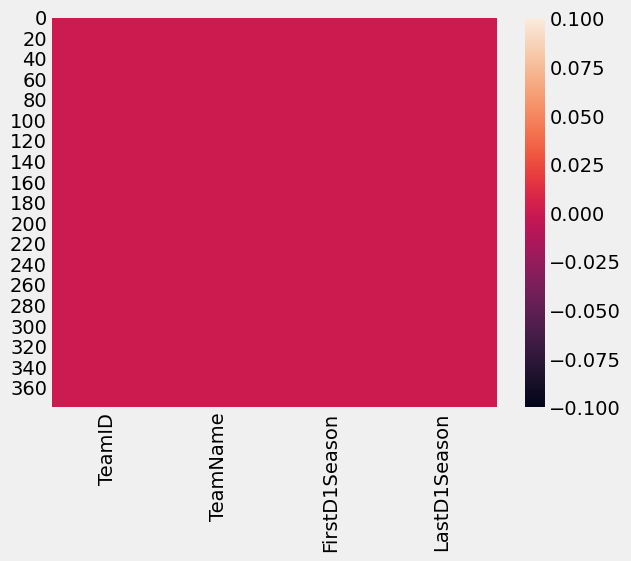

,TeamID,FirstD1Season,LastD1Season
count,378.000000,378.000000,378.000000
mean,1289.500000,1989.431217,2022.989418
std,109.263443,9.434222,5.524951
min,1101.000000,1985.000000,1985.000000
25%,1195.250000,1985.000000,2024.000000
50%,1289.500000,1985.000000,2024.000000
75%,1383.750000,1986.000000,2024.000000
max,1478.000000,2024.000000,2024.000000


In [10]:
mt.head()
mt.info()
import seaborn as sns
sns.heatmap(mt.isnull())
plt.show()
mt.dtypes
mt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TeamNameSpelling  1165 non-null   object
 1   TeamID            1165 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.3+ KB


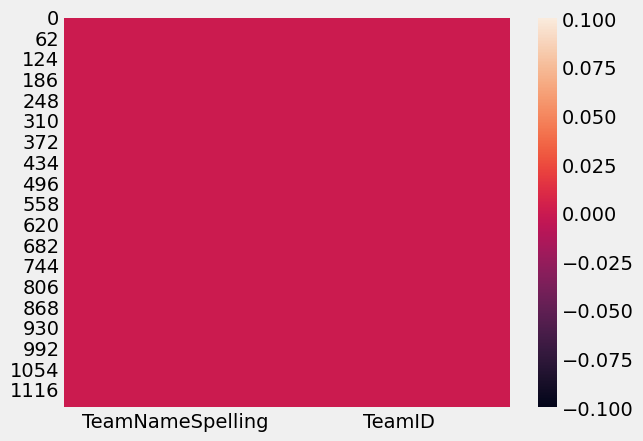

,TeamID
count,1165.000000
mean,1292.375966
std,106.094425
min,1101.000000
25%,1199.000000
50%,1294.000000
75%,1385.000000
max,1478.000000


In [11]:
mts.head()
mts.info()
import seaborn as sns
sns.heatmap(mts.isnull())
plt.show()
mts.dtypes
mts.describe()

# Combining dataframes

In [12]:
TourneySeeds = pd.concat(
    [
        pd.read_csv("/work/MNCAATourneySeeds.csv").assign(League="M"),
        pd.read_csv("/work/WNCAATourneySeeds.csv").assign(League="W"),
    ],
).reset_index(drop=True)

In [13]:
team_season_agg = pd.read_csv('/work/team_season_agg.csv')

In [14]:
TourneySeeds["ChalkSeed"] = (
    TourneySeeds["Seed"].str.replace("a", "").str.replace("b", "").str[1:].astype("int")
)

team_season_agg = team_season_agg.merge(
    TourneySeeds, on=["Season", "TeamID", "League"], how="left"
)

In [15]:
TourneyDetailedResults = pd.concat(
    [
        pd.read_csv("/work/MNCAATourneyDetailedResults.csv").assign(League="M"),
        pd.read_csv("/work/WNCAATourneyDetailedResults.csv").assign(League="W"),
    ]
).reset_index(drop=True)

In [16]:
df_team_TourneyDetailedResults = pd.concat(
    [
        TourneyDetailedResults[
            ["Season", "League", "WTeamID", "LTeamID", "WScore", "LScore"]
        ]
        .assign(GameResult="W")
        .rename(
            columns={
                "WTeamID": "TeamID",
                "LTeamID": "OppTeamID",
                "WScore": "TeamScore",
                "LScore": "OppScore",
            }
        ),
        TourneyDetailedResults[
            ["Season", "League", "LTeamID", "WTeamID", "LScore", "WScore"]
        ]
        .assign(GameResult="L")
        .rename(
            columns={
                "LTeamID": "TeamID",
                "WTeamID": "OppTeamID",
                "LScore": "TeamScore",
                "WScore": "OppScore",
            }
        ),
    ]
).reset_index(drop=True)

df_team_TourneyDetailedResults["Win"] = (df_team_TourneyDetailedResults["GameResult"] == "W").astype(
    "int"
)

In [17]:
df_historic_tourney_features = df_team_TourneyDetailedResults.merge(
    team_season_agg[
        ["Season", "League", "TeamID", "WinPercentage", "MedianScoreDiff", "ChalkSeed"]
    ],
    on=["Season", "League", "TeamID"],
    how="left",
).merge(
    team_season_agg[
        ["Season", "League", "TeamID", "WinPercentage", "MedianScoreDiff", "ChalkSeed"]
    ].rename(
        columns={
            "TeamID": "OppTeamID",
            "WinPercentage": "OppWinPercentage",
            "MedianScoreDiff": "OppMedianScoreDiff",
            "ChalkSeed": "OppChalkSeed",
        }
    ),
    on=["Season", "League", "OppTeamID"],
)

In [18]:
df_historic_tourney_features["WinPctDiff"] = (
    df_historic_tourney_features["WinPercentage"]
    - df_historic_tourney_features["OppWinPercentage"]
)

df_historic_tourney_features["ChalkSeedDiff"] = (
    df_historic_tourney_features["ChalkSeed"]
    - df_historic_tourney_features["OppChalkSeed"]
)

df_historic_tourney_features["MedianScoreDiffDiff"] = (
    df_historic_tourney_features["MedianScoreDiff"]
    - df_historic_tourney_features["OppMedianScoreDiff"]
)

In [19]:
fivethiryeight_scores = pd.concat(
    [
        pd.read_csv("/work/538ratingsMen.csv").assign(
            League="M"
        ),
        pd.read_csv(
            "/work/538ratingsWomen.csv"
        ).assign(League="W"),
    ]
).reset_index(drop=True)

In [20]:
#merging to our data
df_historic_tourney_features = df_historic_tourney_features.merge(
    fivethiryeight_scores.drop("TeamName", axis=1),
    on=["Season", "League", "TeamID"],
    how="left",
).dropna(subset=["538rating"])

df_historic_tourney_features = df_historic_tourney_features.merge(
    fivethiryeight_scores.drop("TeamName", axis=1).rename(
        columns={"TeamID": "OppTeamID"}
    ),
    on=["Season", "League", "OppTeamID"],
    how="left",
    suffixes=("", "Opp"),
)

#differential based 538
df_historic_tourney_features["538rating_diff"] = (
    df_historic_tourney_features["538rating"]
    - df_historic_tourney_features["538ratingOpp"]
)

df_historic_tourney_features[
    ["Season", "TeamID", "538rating", "538ratingOpp", "538rating_diff"]
].head()

,Season,TeamID,538rating,538ratingOpp,538rating_diff
0,2016,1195,71.41,66.72,4.69
1,2016,1455,86.59,85.59,1.00
2,2016,1221,66.85,67.96,-1.11
3,2016,1276,79.57,79.93,-0.36
4,2016,1114,78.90,88.68,-9.78


In [21]:
import pandas as pd
df_season_results = pd.concat(
    [
        pd.read_csv("/work/20240328-084544/MRegularSeasonCompactResults.csv").assign(League="M"),
        pd.read_csv("/work/20240328-084442/WRegularSeasonCompactResults.csv").assign(League="W"),
    ]
).reset_index(drop=True)
df_season_results['ScoreGap'] = df_season_results['WScore'] - df_season_results['LScore']
num_win = df_season_results.groupby(['Season','WTeamID','League']).count()
num_win = num_win.reset_index()[['Season','WTeamID','League','DayNum']].rename(columns = {"DayNum":"NumWins","WTeamID":"TeamID"})

num_loss = df_season_results.groupby(['Season','LTeamID','League']).count()
num_loss = num_loss.reset_index()[['Season','LTeamID','League','DayNum']].rename(columns = {"DayNum":"NumLose","LTeamID":"TeamID"})
team_season_win_loss = num_win.merge(num_loss, on=['Season','TeamID'], how='outer')
# Drop the 'League_x' column
team_season_win_loss = team_season_win_loss.drop(columns=['League_x'])

# Rename the 'League_y' column to 'League'
team_season_win_loss = team_season_win_loss.rename(columns={'League_y': 'League'})
team_season_win_loss['NumLose'] = team_season_win_loss['NumLose'].fillna(0).astype('int')
team_season_win_loss['NumWins'] = team_season_win_loss['NumWins'].fillna(0).astype('int')
df_team_season_results = pd.concat(
    [
        df_season_results[["Season", "League", "WTeamID", "DayNum", "WScore", "LScore"]]
        .assign(GameResult="W")
        .rename(
            columns={"WTeamID": "TeamID", "WScore": "TeamScore", "LScore": "OppScore"}
        ),
        df_season_results[["Season", "League", "LTeamID", "DayNum", "WScore", "LScore"]]
        .assign(GameResult="L")
        .rename(
            columns={"LTeamID": "TeamID", "LScore": "TeamScore", "WScore": "OppScore"}
        ),
    ]
).reset_index(drop=True)
# Score Differential
df_team_season_results["ScoreDiff"] = (
    df_team_season_results["TeamScore"] - df_team_season_results["OppScore"]
)
df_team_season_results["Win"] = (df_team_season_results["GameResult"] == "W").astype(
    "int"
)
# Aggregate the data
team_season_agg = (
    df_team_season_results.groupby(["Season", "TeamID", "League"])
    .agg(
        AvgScoreDiff=("ScoreDiff", "mean"),
        MedianScoreDiff=("ScoreDiff", "median"),
        MinScoreDiff=("ScoreDiff", "min"),
        MaxScoreDiff=("ScoreDiff", "max"),
        Wins=("Win", "sum"),
        Losses=("GameResult", lambda x: (x == "L").sum()),
        WinPercentage=("Win", "mean"),
    )
    .reset_index()
)

In [22]:
df_historic_tourney_features = pd.read_csv('/work/historic_tourney_features.csv')
df_TourneySeedSlot_merged = pd.read_csv('/work/TourneySeedSlot_merged.csv')

In [23]:
df_team_season_results.drop(df_team_season_results.filter(regex="Unname"),axis=1, inplace=True)

In [24]:
df_historic_tourney_features["BaselinePred"] = (
    df_historic_tourney_features["ChalkSeed"]
    < df_historic_tourney_features["OppChalkSeed"]
)

df_historic_tourney_features.loc[
    df_historic_tourney_features["ChalkSeed"]
    == df_historic_tourney_features["OppChalkSeed"],
    "BaselinePred",
] = (
    df_historic_tourney_features["WinPercentage"]
    > df_historic_tourney_features["OppWinPercentage"]
)

In [25]:
df_TourneySeedSlot_merged.drop(df_TourneySeedSlot_merged.filter(regex="Unname"),axis=1, inplace=True)
df_historic_tourney_features.drop(df_historic_tourney_features.filter(regex="Unname"),axis=1, inplace=True)

In [26]:
def Seed_Combine(row):
    return f"{row['Season']} {row['TeamID']}"


df1 = df_TourneySeedSlot_merged.copy()
df2 = df_historic_tourney_features.copy()

df1['tourney_featuresID'] = df1.apply(Seed_Combine, axis=1)
df2['tourney_featuresID'] = df2.apply(Seed_Combine, axis=1)


df_historic_tourney_features_1 = df2.merge(df1, how='left', on='tourney_featuresID')
df_historic_tourney_features_1.drop(columns=['Season_y','TeamID_y','League_y'], inplace=True)
df_historic_tourney_features_1.rename(columns={'Seed_x': 'Seed'}, inplace=True)
df_historic_tourney_features_1.rename(columns={'Season_x': 'Season'}, inplace=True)
df_historic_tourney_features_1.rename(columns={'TeamID_x': 'TeamID'}, inplace=True)
df_historic_tourney_features_1.rename(columns={'League_x': 'League'}, inplace=True)

In [27]:
df_historic_tourney_features.rename(columns={'ChalkSeed_y': 'ChalkSeed'}, inplace=True)
df_historic_tourney_features = df_historic_tourney_features_1.drop(columns= ['ChalkSeed_y'])

In [28]:
#team_season_agg.to_csv('team_season_agg.csv', index = False)
#df_team_season_results.to_csv('df_team_season_results.csv', index = False)
#df_historic_tourney_features.to_csv('df_historic_tourney_features.csv', index = False)

# Training and prediction

In [29]:
import pandas as pd
df_import = pd.read_csv('/work/df_historic_tourney_features')

In [30]:
df_final = df_import.drop(['GameResult', 'ChalkSeed_x','OppScore','TeamScore'], axis=1)

In [31]:
df_final.describe()

,Season,TeamID,OppTeamID,Win,WinPercentage,MedianScoreDiff,OppWinPercentage,OppMedianScoreDiff,OppChalkSeed,WinPctDiff,ChalkSeedDiff,MedianScoreDiffDiff,538rating,538ratingOpp,538rating_diff,ChalkSeed
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1.834000e+03,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,2019.453653,2267.659215,2267.659215,0.500000,0.758976,10.633860,0.758976,10.633860,6.876772,-4.842849e-19,0.000000,0.000000,86.061036,86.061036,0.000000,6.876772
std,2.449107,1001.259285,1001.259285,0.500136,0.107458,6.109382,0.107458,6.109382,4.673529,1.549832e-01,7.445162,8.288921,8.780929,8.780929,13.087172,4.673529
min,2016.000000,1101.000000,1101.000000,0.000000,0.375000,-5.000000,0.375000,-5.000000,1.000000,-4.696970e-01,-15.000000,-38.000000,58.310000,58.310000,-48.470000,1.000000
25%,2017.000000,1277.000000,1277.000000,0.000000,0.677419,6.500000,0.677419,6.500000,3.000000,-1.058735e-01,-5.000000,-4.500000,81.407500,81.407500,-7.415000,3.000000
50%,2019.000000,1459.500000,1459.500000,0.500000,0.764706,10.000000,0.764706,10.000000,6.000000,0.000000e+00,0.000000,0.000000,86.310000,86.310000,0.000000,6.000000
75%,2022.000000,3280.000000,3280.000000,1.000000,0.833333,13.000000,0.833333,13.000000,11.000000,1.058735e-01,5.000000,4.500000,91.015000,91.015000,7.415000,11.000000
max,2023.000000,3461.000000,3461.000000,1.000000,1.000000,43.000000,1.000000,43.000000,16.000000,4.696970e-01,15.000000,38.000000,113.090000,113.090000,48.470000,16.000000


## Random forest

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [33]:
'''
X = df_final.drop(['Win'], axis=1)  # Drop the target variable 'Win' from the features
y = df_final['Win']  # Select the target variable 'Win
'''
df = df_final
# Saving feature names for later use
feature_list = list(df.columns)

In [34]:
df = pd.get_dummies(df)
df.iloc[:,5:].head(5)

,MedianScoreDiff,OppWinPercentage,OppMedianScoreDiff,OppChalkSeed,WinPctDiff,ChalkSeedDiff,MedianScoreDiffDiff,538rating,538ratingOpp,538rating_diff,...,Slot_R1Z8,Slot_W11,Slot_W12,Slot_W16,Slot_X11,Slot_X16,Slot_Y11,Slot_Y16,Slot_Z11,Slot_Z16
0,2.0,0.548387,2.0,16.0,0.003337,0.0,0.0,71.41,66.72,4.69,...,False,False,False,True,False,False,False,False,False,False
1,17.0,0.593750,10.0,11.0,0.148185,0.0,7.0,86.59,85.59,1.00,...,False,False,False,False,False,False,True,False,False,False
2,-4.0,0.612903,4.0,16.0,-0.188661,0.0,-8.0,66.85,67.96,-1.11,...,False,False,False,False,False,False,False,False,False,True
3,5.0,0.645161,8.0,11.0,-0.008798,0.0,-3.0,79.57,79.93,-0.36,...,False,True,False,False,False,False,False,False,False,False
4,8.0,0.764706,13.0,5.0,0.106262,7.0,-5.0,78.90,88.68,-9.78,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df["BaselinePred"] = (
    df["ChalkSeed"]
    < df["OppChalkSeed"]
)

df.loc[
    df["ChalkSeed"]
    == df["OppChalkSeed"],
    "BaselinePred",
] = (
    df["WinPercentage"]
    > df["OppWinPercentage"]
)

In [36]:
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

cv_scores_baseline = []
for season in df["Season"].unique():
    pred = df.query("Season == @season")["BaselinePred"].astype("int")
    y = df.query("Season == @season")["Win"]
    score = accuracy_score(y, pred)
    score_ll = log_loss(y, pred)
    cv_scores_baseline.append(score)
    print(f"Holdout season {season} - Accuracy {score:0.4f} Log Loss {score_ll:0.4f}")

# Calculate average accuracy and baseline error
average_accuracy = np.mean(cv_scores_baseline)
average_error = 1 - average_accuracy

print(f"Baseline Accuracy {average_accuracy:0.4f}")
print(f"Baseline Error {average_error:0.4f}")


Holdout season 2016 - Accuracy 0.6846 Log Loss 10.8931
Holdout season 2017 - Accuracy 0.7769 Log Loss 7.7049
Holdout season 2018 - Accuracy 0.7000 Log Loss 10.3618
Holdout season 2019 - Accuracy 0.7538 Log Loss 8.5020
Holdout season 2021 - Accuracy 0.7519 Log Loss 8.5679
Holdout season 2022 - Accuracy 0.7015 Log Loss 10.3102
Holdout season 2023 - Accuracy 0.7164 Log Loss 9.7947
Baseline Accuracy 0.7265
Baseline Error 0.2735


In [37]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
Df_1 = df

from sklearn.model_selection import GroupKFold

FEATURES = [
    "WinPercentage",
    "MedianScoreDiff",
    "MedianScoreDiffDiff",
    #  "ChalkSeed",
    "OppWinPercentage",
    # "OppChalkSeed",
    "WinPctDiff",
    "ChalkSeedDiff",
    "TeamID",
    "OppTeamID",
    "538rating",
    "538ratingOpp",
    "538rating_diff",
]
TARGET = "Win"

y = (Df_1['Win'])
X= Df_1.drop('Win', axis = 1)
#X = list(Df_1.columns)
#X = np.array(X)
groups = Df_1["Season"]
seasons = Df_1["Season"].unique()



In [38]:
# Setup cross-validation
from sklearn.model_selection import GroupKFold
import numpy as np
gkf = GroupKFold(n_splits=Df_1["Season"].nunique())
cv_results = []
models = []

season_idx = 0
for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_test = np.array(X_test)
    X_train = np.array(X_train)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    # Prepare the model
    # Import the model we are using
    from sklearn.ensemble import RandomForestRegressor
    # Instantiate model with 1000 decision trees
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    # Train the model on training data
    model.fit(X_train, y_train);

    holdout_season = seasons[season_idx]
    print(f"Holdout Season: {holdout_season}")
    # Train the model
   # model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

    # Use the forest's predict method on the test data
    predictions = model.predict(X_test)
    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

    mse = np.mean(errors**2)  # Calculate mean squared error

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mse)
    cv_results.append(accuracy)
    print('Accuracy:', round(accuracy, 2), '%.')
    models.append(model)
    season_idx += 1
    # Get numerical feature importances
    importances = list(model.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances
    # Print only the first 10 features and their importances
    for i, pair in enumerate(feature_importances):
        if i >= 10:
            break
        print('Variable: {:20} Importance: {}'.format(*pair))
    #[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Print the average accuracy across all folds
print("Average CV Accuracy:", np.mean(cv_results))

Holdout Season: 2016
Mean Absolute Error: 0.37 degrees.
Accuracy: 99.8 %.
Variable: 538rating            Importance: 0.41
Variable: League               Importance: 0.05
Variable: TeamID               Importance: 0.05
Variable: OppMedianScoreDiff   Importance: 0.05
Variable: OppTeamID            Importance: 0.04
Variable: WinPercentage        Importance: 0.04
Variable: WinPctDiff           Importance: 0.04
Variable: ChalkSeedDiff        Importance: 0.04
Variable: MedianScoreDiffDiff  Importance: 0.04
Variable: Win                  Importance: 0.03
Holdout Season: 2017
Mean Absolute Error: 0.36 degrees.
Accuracy: 99.81 %.
Variable: 538rating            Importance: 0.4
Variable: League               Importance: 0.05
Variable: TeamID               Importance: 0.05
Variable: OppMedianScoreDiff   Importance: 0.05
Variable: OppTeamID            Importance: 0.04
Variable: WinPercentage        Importance: 0.04
Variable: WinPctDiff           Importance: 0.04
Variable: ChalkSeedDiff        Impor

## XGBoost

In [39]:
df_2 = df_final

import xgboost as xgb
from sklearn.model_selection import GroupKFold

FEATURES = [
    "WinPercentage",
    "MedianScoreDiff",
    "MedianScoreDiffDiff",
    #  "ChalkSeed",
    "OppWinPercentage",
    # "OppChalkSeed",
    "WinPctDiff",
    "ChalkSeedDiff",
    "TeamID",
    "OppTeamID",
    "538rating",
    "538ratingOpp",
    "538rating_diff",
]
TARGET = "Win"

X = df_2[FEATURES]
y = df_2[TARGET]
groups = df_2["Season"]
seasons = df_2["Season"].unique()

# Setup cross-validation
gkf = GroupKFold(n_splits=df_2["Season"].nunique())
cv_results = []
models = []

season_idx = 0
for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Prepare the model
    model = xgb.XGBRegressor(
        eval_metric="logloss",
        n_estimators=1_000,
        learning_rate=0.001,
    )
    holdout_season = seasons[season_idx]
    print(f"Holdout Season: {holdout_season}")
    # Train the model
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

    # Predict on the test set
    y_pred = model.predict(X_test)
    score_ll = log_loss(y_test, y_pred)
    y_pred = y_pred > 0.5
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cv_results.append(accuracy)
    season_idx += 1
    print(f"Season {holdout_season}: {accuracy} {score_ll}")
    models.append(model)
# Print the average accuracy across all folds
print("Average CV Accuracy:", np.mean(cv_results))

Holdout Season: 2016
[0]	validation_0-logloss:0.69283
[100]	validation_0-logloss:0.66426
[200]	validation_0-logloss:0.64081
[300]	validation_0-logloss:0.62319
[400]	validation_0-logloss:0.60956
[500]	validation_0-logloss:0.59800
[600]	validation_0-logloss:0.58880
[700]	validation_0-logloss:0.58179
[800]	validation_0-logloss:0.57635
[900]	validation_0-logloss:0.57208
[999]	validation_0-logloss:0.56834
Season 2016: 0.7052238805970149 0.5683443645821579
Holdout Season: 2017
[0]	validation_0-logloss:0.69286
[100]	validation_0-logloss:0.66726
[200]	validation_0-logloss:0.64693
[300]	validation_0-logloss:0.63027
[400]	validation_0-logloss:0.61639
[500]	validation_0-logloss:0.60474
[600]	validation_0-logloss:0.59595
[700]	validation_0-logloss:0.58779
[800]	validation_0-logloss:0.58020
[900]	validation_0-logloss:0.57382
[999]	validation_0-logloss:0.56960
Season 2017: 0.6940298507462687 0.5695973633607821
Holdout Season: 2018
[0]	validation_0-logloss:0.69276
[100]	validation_0-logloss:0.65837
[

In [40]:
TEST_SEASON = 2024
seeds_2024 = pd.read_csv("/work/2024_tourney_seeds.csv")

seeds_2024["ChalkSeed"] = (seeds_2024["Seed"].str.replace("a", "").str.replace("b", "").str[1:].astype("int"))

team_season_agg = pd.read_csv("/work/team_season_agg.csv")

In [41]:
df_import["ScoreDiff"] = (
    df_import["TeamScore"] - df_import["OppScore"]
)

fivethiryeight_scores = pd.concat(
    [
        pd.read_csv("/work/538ratingsMen.csv").assign(
            League="M"
        ),
        pd.read_csv(
            "/work/538ratingsWomen.csv"
        ).assign(League="W"),
    ]
).reset_index(drop=True)


tourney_pairs = (
    seeds_2024.merge(seeds_2024, on=["Tournament"], suffixes=("", "Opp"))
    .assign(Season=TEST_SEASON)
    .query("TeamID != TeamIDOpp")
    .rename(columns={"Tournament": "League"})
)

tourney_pairs = (
    tourney_pairs.merge(
        team_season_agg[
            ["Season", "League", "TeamID", "WinPercentage", "MedianScoreDiff"]
        ],
        on=["Season", "League", "TeamID"],
        how="left",
    )
    .merge(
        team_season_agg[
            ["Season", "League", "TeamID", "WinPercentage", "MedianScoreDiff"]
        ].rename(
            columns={
                "TeamID": "TeamIDOpp",
                "WinPercentage": "OppWinPercentage",
                "MedianScoreDiff": "OppMedianScoreDiff",
            }
        ),
        on=["Season", "League", "TeamIDOpp"],
    )
    .reset_index(drop=True)
)

tourney_pairs["OppChalkSeed"] = (
    tourney_pairs["SeedOpp"]
    .str.replace("a", "")
    .str.replace("b", "")
    .str[1:]
    .astype("int")
)
tourney_pairs = tourney_pairs.merge(
    fivethiryeight_scores.drop("TeamName", axis=1),
    on=["Season", "League", "TeamID"],
    how="left",
)

tourney_pairs = tourney_pairs.merge(
    fivethiryeight_scores.drop("TeamName", axis=1).rename(
        columns={"TeamID": "TeamIDOpp"}
    ),
    on=["Season", "League", "TeamIDOpp"],
    how="left",
    suffixes=("", "Opp"),
)

# Diff features
tourney_pairs["538rating_diff"] = (
    tourney_pairs["538rating"] - tourney_pairs["538ratingOpp"]
)

tourney_pairs["BaselinePred"] = (
    tourney_pairs["ChalkSeed"] < tourney_pairs["OppChalkSeed"]
)

tourney_pairs.loc[
    tourney_pairs["ChalkSeed"] == tourney_pairs["OppChalkSeed"],
    "BaselinePred",
] = (
    tourney_pairs["WinPercentage"] > tourney_pairs["OppWinPercentage"]
)

tourney_pairs["WinPctDiff"] = (
    tourney_pairs["WinPercentage"] - tourney_pairs["OppWinPercentage"]
)

tourney_pairs["ChalkSeedDiff"] = (
    tourney_pairs["ChalkSeed"] - tourney_pairs["OppChalkSeed"]
)

tourney_pairs["MedianScoreDiffDiff"] = (
    tourney_pairs["MedianScoreDiff"] - tourney_pairs["OppMedianScoreDiff"]
)

### creating prediction

In [42]:
tourney_pairs["Pred"] = tourney_pairs[
    [f for f in tourney_pairs.columns if "model" in f]
].mean(axis=1)

tourney_pairs["ID"] = (
    tourney_pairs["Season"].astype("str")
    + "_"
    + tourney_pairs["TeamID"].astype("str")
    + "_"
    + tourney_pairs["TeamIDOpp"].astype("str")
)

preds = tourney_pairs.copy()

In [43]:
from tqdm import tqdm

# Load and filter data
round_slots = pd.read_csv(
    "/work/MNCAATourneySlots.csv"
)
round_slots = round_slots[round_slots["Season"] == 2023]
round_slots = round_slots[
    round_slots["Slot"].str.contains("R")
]  # Filter out First Four

seeds = seeds_2024
seeds_m = seeds[seeds["Tournament"] == "M"]
seeds_w = seeds[seeds["Tournament"] == "W"]

preds["ID"] = preds["ID"].str.split("_")

In [44]:
preds

,League,Seed,TeamID,ChalkSeed,SeedOpp,TeamIDOpp,ChalkSeedOpp,Season,WinPercentage,MedianScoreDiff,...,OppChalkSeed,538rating,538ratingOpp,538rating_diff,BaselinePred,WinPctDiff,ChalkSeedDiff,MedianScoreDiffDiff,Pred,ID
0,M,W01,1163,1,W02,1235,2,2024,0.911765,14.0,...,2,NaN,NaN,NaN,True,0.117647,-1,4.0,NaN,"[2024, 1163, 1235]"
1,M,W03,1228,3,W02,1235,2,2024,0.764706,9.5,...,2,NaN,NaN,NaN,False,-0.029412,1,-0.5,NaN,"[2024, 1228, 1235]"
2,M,W04,1120,4,W02,1235,2,2024,0.794118,17.0,...,2,NaN,NaN,NaN,False,0.000000,2,7.0,NaN,"[2024, 1120, 1235]"
3,M,W05,1361,5,W02,1235,2,2024,0.687500,8.5,...,2,NaN,NaN,NaN,False,-0.106618,3,-1.5,NaN,"[2024, 1361, 1235]"
4,M,W06,1140,6,W02,1235,2,2024,0.696970,9.0,...,2,NaN,NaN,NaN,False,-0.097148,4,-1.0,NaN,"[2024, 1140, 1235]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,W,Z12,3162,12,W01,3376,1,2024,0.793103,13.0,...,1,NaN,NaN,NaN,False,-0.206897,11,-13.0,NaN,"[2024, 3162, 3376]"
8060,W,Z13,3267,13,W01,3376,1,2024,0.800000,11.5,...,1,NaN,NaN,NaN,False,-0.200000,12,-14.5,NaN,"[2024, 3267, 3376]"
8061,W,Z14,3238,14,W01,3376,1,2024,0.793103,15.0,...,1,NaN,NaN,NaN,False,-0.206897,13,-11.0,NaN,"[2024, 3238, 3376]"
8062,W,Z15,3263,15,W01,3376,1,2024,0.727273,10.0,...,1,NaN,NaN,NaN,False,-0.272727,14,-16.0,NaN,"[2024, 3263, 3376]"


In [45]:
import numpy as np
def prepare_data(seeds, preds):
    # Function preparing the data for the simulation
    seed_dict = seeds.set_index("Seed")["TeamID"].to_dict()
    inverted_seed_dict = {value: key for key, value in seed_dict.items()}
    probas_dict = {}

    for teams, proba in zip(preds["ID"], preds["Pred"]):
        team1, team2 = teams[1], teams[2]

        probas_dict.setdefault(team1, {})[team2] = proba
        probas_dict.setdefault(team2, {})[team1] = 1 - proba

    return seed_dict, inverted_seed_dict, probas_dict


def simulate(round_slots, seeds, inverted_seeds, probas, sim=True):
    """
    Simulates each round of the tournament.

    Parameters:
    - round_slots: DataFrame containing information on who is playing in each round.
    - seeds (dict): Dictionary mapping seed values to team IDs.
    - inverted_seeds (dict): Dictionary mapping team IDs to seed values.
    - probas (dict): Dictionary containing matchup probabilities.
    - sim (boolean): Simulates match if True. Chooses team with higher probability as winner otherwise.

    Returns:
    - list: List with winning team IDs for each match.
    - list: List with corresponding slot names for each match.
    """
    winners = []
    slots = []

    for slot, strong, weak in zip(
        round_slots.Slot, round_slots.StrongSeed, round_slots.WeakSeed
    ):
        team_1, team_2 = seeds[strong], seeds[weak]

        # Get the probability of team_1 winning
        proba = probas[str(team_1)][str(team_2)]

        if sim:
            # Randomly determine the winner based on the probability
            winner = np.random.choice([team_1, team_2], p=[proba, 1 - proba])
        else:
            # Determine the winner based on the higher probability
            winner = [team_1, team_2][np.argmax([proba, 1 - proba])]

        # Append the winner and corresponding slot to the lists
        winners.append(winner)
        slots.append(slot)

        seeds[slot] = winner

    # Convert winners to original seeds using the inverted_seeds dictionary
    return [inverted_seeds[w] for w in winners], slots


def run_simulation(brackets=4, seeds=None, preds=None, round_slots=None, sim=False):
    """
    Runs a simulation of bracket tournaments.

    Parameters:
    - brackets (int): Number of brackets to simulate.
    - seeds (pd.DataFrame): DataFrame containing seed information.
    - preds (pd.DataFrame): DataFrame containing prediction information for each match-up.
    - round_slots (pd.DataFrame): DataFrame containing information about the tournament rounds.
    - sim (boolean): Simulates matches if True. Chooses team with higher probability as winner otherwise.

    Returns:
    - pd.DataFrame: DataFrame with simulation results.
    """
    # Get relevant data for the simulation
    seed_dict, inverted_seed_dict, probas_dict = prepare_data(seeds, preds)
    # Lists to store simulation results
    results = []
    bracket = []
    slots = []

    # Iterate through the specified number of brackets
    for b in tqdm(range(1, brackets + 1)):
        # Run single simulation
        r, s = simulate(round_slots, seed_dict, inverted_seed_dict, probas_dict, sim)

        # Update results
        results.extend(r)
        bracket.extend([b] * len(r))
        slots.extend(s)

    # Create final DataFrame
    result_df = pd.DataFrame({"Bracket": bracket, "Slot": slots, "Team": results})

    return result_df


n_brackets = 1
result_m = run_simulation(
    brackets=n_brackets, seeds=seeds_m, preds=preds, round_slots=round_slots, sim=False
)
result_m["Tournament"] = "M"
result_w = run_simulation(
    brackets=n_brackets, seeds=seeds_w, preds=preds, round_slots=round_slots, sim=False
)
result_w["Tournament"] = "W"
submission = pd.concat([result_m, result_w])
submission = submission.reset_index(drop=True)
submission.index.names = ["RowId"]
submission = submission.reset_index()

100%|██████████| 1/1 [00:00<00:00, 590.58it/s]


In [46]:
ss = pd.read_csv("/work/sample_submission.csv")
submission[ss.columns] = submission[ss.columns]
submission[ss.columns].to_csv("submission.csv", index=False)

In [49]:
submission = submission.rename(columns={"Team": "Seed"}).merge(
    seeds, on=["Seed", "Tournament"], how="left"
)
submission = submission.rename(columns={"TeamID_x": "Team_ID", "ChalkSeed_x":"ChalkSeed"})
submission = submission.drop('TeamID_y', axis=1)
submission = submission.drop('ChalkSeed_y', axis=1)

teams = pd.concat(
    [
        pd.read_csv("/work/MTeams.csv").assign(Tournament="M"),
        pd.read_csv("/work/WTeams.csv").assign(Tournament="W"),
    ]
)

submission = submission.merge(
    teams[["Tournament", "TeamID", "TeamName"]], on=["Tournament","TeamID"],how="left"
)

In [53]:
submission

,RowId,Bracket,Slot,Seed,Tournament,Team_ID,ChalkSeed,TeamID_y,ChalkSeed_y,TeamID,ChalkSeed_y,TeamName
0,0,1,R1W1,W01,M,1163,1,1163,1,1163,1,Connecticut
1,1,1,R1W2,W02,M,1235,2,1235,2,1235,2,Iowa St
2,2,1,R1W3,W03,M,1228,3,1228,3,1228,3,Illinois
3,3,1,R1W4,W04,M,1120,4,1120,4,1120,4,Auburn
4,4,1,R1W5,W05,M,1361,5,1361,5,1361,5,San Diego St
...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,1,R4Y1,Y01,W,3234,1,3234,1,3234,1,Iowa
122,122,1,R4Z1,Z01,W,3425,1,3425,1,3425,1,USC
123,123,1,R5WX,W01,W,3376,1,3376,1,3376,1,South Carolina
124,124,1,R5YZ,Y01,W,3234,1,3234,1,3234,1,Iowa


In [55]:
submission.to_csv("submission.csv",index = False)

# Output

In [60]:
import pandas as pd
data = pd.read_csv('submission.csv')
dataW =  data[data.Tournament == 'W']
dataM =  data[data.Tournament == 'M']

In [61]:
#for men's tournament

import pandas as pd
from pprint import pprint

# Define a function to create team information
def create_team_info(dataM):
    teams = {}
    for _, row in dataM.iterrows():
        teams[row['TeamID']] = {'TeamName': row['TeamName'], 'Seed': row['Seed']}
    return teams

# Create team information dictionary
teams_info = create_team_info(dataM)

# Define an empty bracket structure
bracket = {}

# Function to populate bracket
def populate_bracket(dataM, bracket):
    for _, row in dataM.iterrows():
        round_name = row['Bracket']
        slot = row['Slot']
        team_id = row['TeamID']
        team_name = teams_info[team_id]['TeamName']
        seed = teams_info[team_id]['Seed']

        if round_name not in bracket:
            bracket[round_name] = {}

        bracket[round_name][slot] = {'TeamName': team_name, 'Seed': seed}

# Populate the bracket
populate_bracket(dataM, bracket)

# Function to print bracket
def print_bracket(bracket, indent=0):
    for round_name, round_data in sorted(bracket.items()):
        print(' ' * indent + f"Round {round_name}:")
        for slot, team_info in sorted(round_data.items()):
            team_name = team_info['TeamName']
            seed = team_info['Seed']
            print(' ' * (indent + 2) + f"{slot}: {seed} {team_name}")
        print()

# Print the bracket
print_bracket(bracket)

Round 1:
  R1W1: W01 Connecticut
  R1W2: W02 Iowa St
  R1W3: W03 Illinois
  R1W4: W04 Auburn
  R1W5: W05 San Diego St
  R1W6: W06 BYU
  R1W7: W07 Washington St
  R1W8: W08 FL Atlantic
  R1X1: X01 North Carolina
  R1X2: X02 Arizona
  R1X3: X03 Baylor
  R1X4: X04 Alabama
  R1X5: X05 St Mary's CA
  R1X6: X06 Clemson
  R1X7: X07 Dayton
  R1X8: X08 Mississippi St
  R1Y1: Y01 Purdue
  R1Y2: Y02 Tennessee
  R1Y3: Y03 Creighton
  R1Y4: Y04 Kansas
  R1Y5: Y05 Gonzaga
  R1Y6: Y06 South Carolina
  R1Y7: Y07 Texas
  R1Y8: Y08 Utah St
  R1Z1: Z01 Houston
  R1Z2: Z02 Marquette
  R1Z3: Z03 Kentucky
  R1Z4: Z04 Duke
  R1Z5: Z05 Wisconsin
  R1Z6: Z06 Texas Tech
  R1Z7: Z07 Florida
  R1Z8: Z08 Nebraska
  R2W1: W01 Connecticut
  R2W2: W02 Iowa St
  R2W3: W03 Illinois
  R2W4: W04 Auburn
  R2X1: X01 North Carolina
  R2X2: X02 Arizona
  R2X3: X03 Baylor
  R2X4: X04 Alabama
  R2Y1: Y01 Purdue
  R2Y2: Y02 Tennessee
  R2Y3: Y03 Creighton
  R2Y4: Y04 Kansas
  R2Z1: Z01 Houston
  R2Z2: Z02 Marquette
  R2Z3: Z03 

In [62]:
#women's tournament

import pandas as pd
from pprint import pprint

# Define a function to create team information
def create_team_info(dataW):
    teams = {}
    for _, row in dataW.iterrows():
        teams[row['TeamID']] = {'TeamName': row['TeamName'], 'Seed': row['Seed']}
    return teams

# Create team information dictionary
teams_info = create_team_info(dataW)

# Define an empty bracket structure
bracket = {}

# Function to populate bracket
def populate_bracket(dataW, bracket):
    for _, row in dataW.iterrows():
        round_name = row['Bracket']
        slot = row['Slot']
        team_id = row['TeamID']
        team_name = teams_info[team_id]['TeamName']
        seed = teams_info[team_id]['Seed']

        if round_name not in bracket:
            bracket[round_name] = {}

        bracket[round_name][slot] = {'TeamName': team_name, 'Seed': seed}

# Populate the bracket
populate_bracket(dataW, bracket)

# Function to print bracket
def print_bracket(bracket, indent=0):
    for round_name, round_data in sorted(bracket.items()):
        print(' ' * indent + f"Round {round_name}:")
        for slot, team_info in sorted(round_data.items()):
            team_name = team_info['TeamName']
            seed = team_info['Seed']
            print(' ' * (indent + 2) + f"{slot}: {seed} {team_name}")
        print()

# Print the bracket
print_bracket(bracket)

Round 1:
  R1W1: W01 South Carolina
  R1W2: W02 Notre Dame
  R1W3: W03 Oregon St
  R1W4: W04 Indiana
  R1W5: W05 Oklahoma
  R1W6: W06 Nebraska
  R1W7: W07 Mississippi
  R1W8: W08 North Carolina
  R1X1: X01 Texas
  R1X2: X02 Stanford
  R1X3: X03 NC State
  R1X4: X04 Gonzaga
  R1X5: X05 Utah
  R1X6: X06 Tennessee
  R1X7: X07 Iowa St
  R1X8: X08 Alabama
  R1Y1: Y01 Iowa
  R1Y2: Y02 UCLA
  R1Y3: Y03 LSU
  R1Y4: Y04 Kansas St
  R1Y5: Y05 Colorado
  R1Y6: Y06 Louisville
  R1Y7: Y07 Creighton
  R1Y8: Y08 West Virginia
  R1Z1: Z01 USC
  R1Z2: Z02 Ohio St
  R1Z3: Z03 Connecticut
  R1Z4: Z04 Virginia Tech
  R1Z5: Z05 Baylor
  R1Z6: Z06 Syracuse
  R1Z7: Z07 Duke
  R1Z8: Z08 Kansas
  R2W1: W01 South Carolina
  R2W2: W02 Notre Dame
  R2W3: W03 Oregon St
  R2W4: W04 Indiana
  R2X1: X01 Texas
  R2X2: X02 Stanford
  R2X3: X03 NC State
  R2X4: X04 Gonzaga
  R2Y1: Y01 Iowa
  R2Y2: Y02 UCLA
  R2Y3: Y03 LSU
  R2Y4: Y04 Kansas St
  R2Z1: Z01 USC
  R2Z2: Z02 Ohio St
  R2Z3: Z03 Connecticut
  R2Z4: Z04 Virgi

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=55818a2a-aa29-41c5-8e55-08dedf093bd8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>